## 8-3 Reuters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# X_train, y_test, y_train, y_test = train_test_split(train_data,train_labels, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,test_size= 0.25,random_state= 2023)

val_data= (x_val, y_val)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))


# 민제님
# (X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2023)

8982
2
2246
46


In [3]:
len(train_data[0])

87

In [4]:
len(x_train)

6736

In [5]:
train_data.shape

(8982,)

In [6]:
test_data.shape

(2246,)

In [7]:
x_train.shape

(6736,)

In [8]:
y_train.shape

(6736,)

In [9]:
x_val.shape

(2246,)

In [10]:
y_val.shape

(2246,)

In [11]:
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# x_train = pad_sequences(X_train, maxlen=max_len)
# x_test = pad_sequences(x_test, maxlen=max_len)

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data): #오
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
test_labels = to_categorical(test_labels)

모델 구성 및 컴파일

In [12]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Input(shape=(10000, )))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))



model.add(layers.Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
model.save('thankyouall')
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

In [13]:
check_point_cb = callbacks.ModelCheckpoint('thankyouall', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=24, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20,batch_size = 1024,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/20
7/7 [==============================] - 2s 94ms/step - loss: 2.8496 - accuracy: 0.3885 - val_loss: 3.4764 - val_accuracy: 0.6541
INFO:tensorflow:Assets written to: thankyouall/assets
Epoch 2/20
7/7 [==============================] - 0s 33ms/step - loss: 1.6245 - accuracy: 0.6688 - val_loss: 3.2843 - val_accuracy: 0.7199
INFO:tensorflow:Assets written to: thankyouall/assets
Epoch 3/20
7/7 [==============================] - 0s 33ms/step - loss: 1.2505 - accuracy: 0.7372 - val_loss: 3.1338 - val_accuracy: 0.7444
INFO:tensorflow:Assets written to: thankyouall/assets
Epoch 4/20
7/7 [==============================] - 0s 34ms/step - loss: 1.0397 - accuracy: 0.7778 - val_loss: 2.9929 - val_accuracy: 0.7480
INFO:tensorflow:Assets written to: thankyouall/assets
Epoch 5/20
7/7 [==============================] - 0s 33ms/step - loss: 0.8759 - accuracy: 0.8112 - val_loss: 2.8458 - val_accuracy: 0.7400
INFO:tensorflow:Assets written to: thankyouall/assets
Epoch 6/20
7/7 [===================

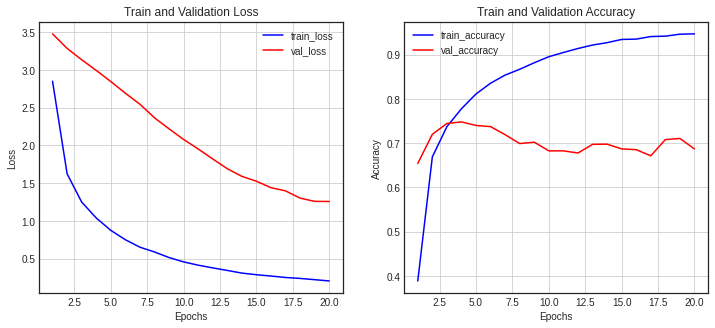

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 회고

1) 훈련데이터와 테스트 데이터만 가지고 다루다가, 훈련데이터, 검증데이터, 테스트 데이터로 나누어 보았다. 변수가 많아져서 처음에는 어지러웠습니다만, 지금은 조금 익숙해졌다. 그리고 왜 그렇게 나눠야하는지도 이해했다.(이렇게 나누는 것이 훨씬 더 현실적이겠다)






